# Development rig

In [1]:
N,L_d=20,8
import sys

# setting path
sys.path.append('/home/mike/Documents/github/modwaves')

import matplotlib.pyplot as plt
import numpy as np

from waterwaves1.wave import wave1,wave_base,Hmx_d
from waterwaves1.display import eta

def check_base(SOL):
    return np.all(extract(SOL,'success'))

def extract(SOL,attr):
    return [getattr(sol,attr) for sol in SOL]

In [2]:
def dspEj(N,H,L_d):
    SOL=wave_base(N,H,L_d)
    SOLx=np.array(extract(SOL,'x'))    
    plt.plot(H,SOLx[:,:-2],label=[f'j={j}' for j in range(1,SOLx.shape[1]-1)])

def dspQR(N,H,L_d):
    SOL=wave_base(N,H,L_d)
    SOLx=np.array(extract(SOL,'x'))
    plt.plot(H,SOLx[:,-2:],label=['Q','R'])

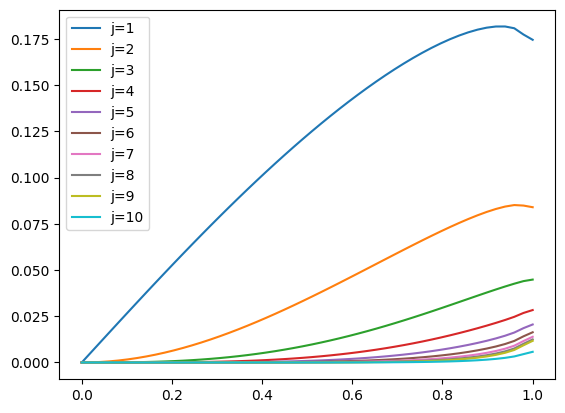

In [3]:
dspEj(10,np.linspace(0,1),L_d) # check breakdown
plt.legend()
plt.show()

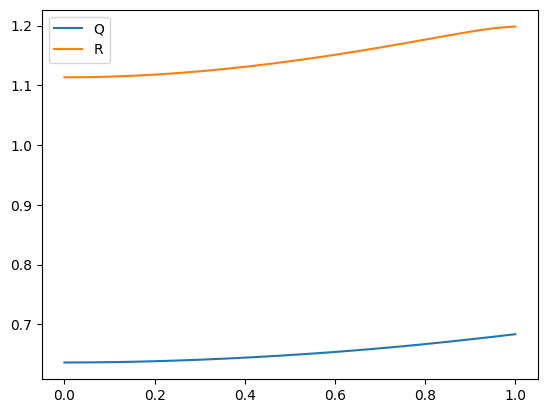

In [4]:
dspQR(10,np.linspace(0,1),L_d) # check breakdown
plt.legend()
plt.show()

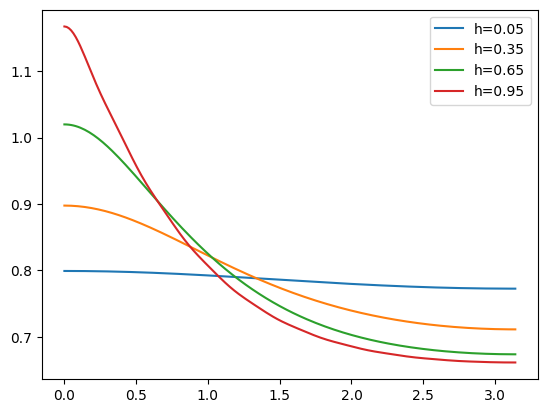

In [5]:
X=np.linspace(0,np.pi,200)

for h in np.linspace(0.05,0.95,4):
    d=2*np.pi/L_d
    solN=wave1(N,h*Hmx_d(L_d)*d,d=d)
    if not solN.success:
        print(solN)
    eta(X,d,solN,f'h={h:4.2f}')
plt.legend()
plt.show()

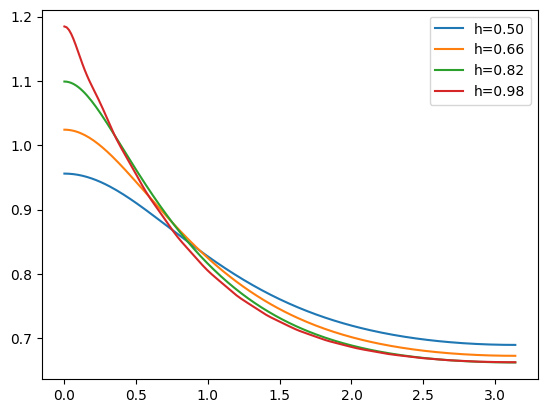

In [8]:
X=np.linspace(0,np.pi,200)

for h in np.linspace(0.5,0.98,4):
    d=2*np.pi/L_d
    solN=wave1(N,h*Hmx_d(L_d)*d,d=d)
    if not solN.success:
        print(solN)
    solN10=wave1(N+10,h*Hmx_d(L_d)*d,d=d,A0=np.insert(solN.x,-2,np.zeros(10)))
    if not solN10.success:
        print(solN10)
    eta(X,d,solN10,f'h={h:4.2f}')
plt.legend()
plt.show()